In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

MINST

In [2]:
from keras .datasets import mnist

Using TensorFlow backend.


In [3]:
(x0_train,y0_train),(x0_test, y0_test) = mnist.load_data()

In [4]:
len(x0_train)

60000

In [5]:
len(x0_test)

10000

In [6]:
x0_train[59991]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  11,  24,  24,  24,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  66, 162, 204, 254, 253, 253, 136,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  39, 143, 235, 253, 253, 216, 184, 235, 253,  75,   0,   0,
          0,   0],
       [  

In [7]:
y0_train[59991]

2

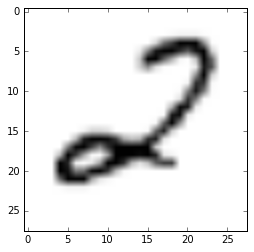

In [8]:
plt.imshow(x0_train[59991], cmap="Greys")

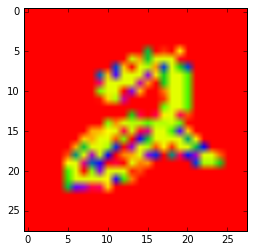

In [9]:
plt.imshow(x0_train[5], cmap="prism")

In [10]:
y0_train[5555]

7

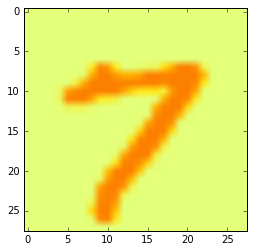

In [11]:
plt.imshow(x0_train[5555], cmap="Wistia")

In [12]:
x_train = x0_train.reshape(60000,28*28)

In [13]:
x_test = x0_test.reshape(10000,28*28)

In [14]:
from keras.utils import np_utils

In [15]:
y_train = np_utils.to_categorical(y0_train,10)

In [16]:
y_test = np_utils.to_categorical(y0_test,10)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
model.add(Dense(units=500, input_dim=784))
model.add(Activation('sigmoid'))

In [20]:
model.add(Dense(units=500))
model.add(Activation('sigmoid'))

In [21]:
model.add(Dense(units=10))
model.add(Activation('softmax'))

compile

In [22]:
model.compile(loss='mse', optimizer=SGD(lr=0.1),metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 12s - loss: 0.0827 - acc: 0.3672    
Epoch 2/20
60000/60000 [==============================] - 13s - loss: 0.0627 - acc: 0.6260    
Epoch 3/20
60000/60000 [==============================] - 13s - loss: 0.0453 - acc: 0.7556    
Epoch 4/20
60000/60000 [==============================] - 13s - loss: 0.0339 - acc: 0.8238    
Epoch 5/20
60000/60000 [==============================] - 14s - loss: 0.0265 - acc: 0.8669    
Epoch 6/20
60000/60000 [==============================] - 13s - loss: 0.0219 - acc: 0.8875    
Epoch 7/20
60000/60000 [==============================] - 13s - loss: 0.0190 - acc: 0.8974    
Epoch 8/20
60000/60000 [==============================] - 13s - loss: 0.0170 - acc: 0.9054    
Epoch 9/20
60000/60000 [==============================] - 14s - loss: 0.0156 - acc: 0.9110    
Epoch 10/20
60000/60000 [==============================] - 13s - loss: 0.0146 - acc: 0.9158    
Epoch 11/20
60000/60000 [========================

In [24]:
from ipywidgets import interact_manual

In [25]:
result = model.predict_classes(x_test)

10000/10000 [==============================] - 0s     


In [26]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

神經網路判斷為: 4


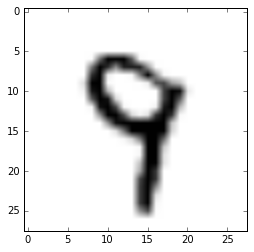

In [27]:
interact_manual(辨識, 測試編號 = (0, 9999));

In [28]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')